<a href="https://colab.research.google.com/github/krucx/ML_from_scratch/blob/main/NueralNetworkFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [220]:
def initialise_weights(nueron_layers):
  weight_list = []
  biases = []
  for i in range(len(nueron_layers)-1):
    weight_list.append(np.random.randn(nueron_layers[i],nueron_layers[i+1]))
    biases.append(np.random.randn(1,nueron_layers[i+1]))
  
  return weight_list,biases

def sigmoid(z):
  return 1/(1+np.exp(-z))

def det_sigmoid(z):
  return (np.exp(-z)/(1+np.exp(-z))**2)

def forward_propogation(input,weight_list,biases):
  x = np.reshape(np.array(input),(1,len(input)))
  a = [x]
  z = [1]
  for i,weight in enumerate(weight_list):
    x = np.matmul(x,weight) + biases[i]
    z.append(x)
    x = sigmoid(x)
    a.append(x)
  return z,a

def loss_function(predicted,expected):
  return -1*np.sum(np.multiply(expected,np.log(predicted))+np.multiply(1-expected,np.log(1-predicted)))/3

def backpropogation(weight_list,biases,z,a,expected,lr):

  dz = a[-1] - expected

  for i in range(2,len(a)+1):
    dw = np.matmul(a[-i].T,dz)
    weight_list[1-i] = weight_list[1-i] - lr*dw
    biases[1-i] = biases[1-i] - lr*dz
    #print(weight_list[1-i].shape)
    dz = np.matmul(dz,weight_list[1-i].T)*det_sigmoid(z[-i])

def training(weight_list,biases,input,expected,lr):
  l = len(expected)
  expected = np.reshape(expected,(1,l))
  z,a = forward_propogation(input,weight_list,biases)
  backpropogation(weight_list,biases,z,a,expected,lr)
  return loss_function(a[-1],expected)

#bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
#print(bce([[1.0,0.0,1.0]],predicted))

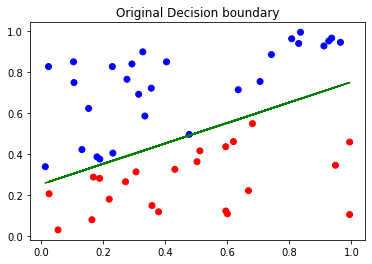

In [221]:
boundary = [0.5,-1,0.25]

def createDataset(theta=[0.5,-1,0.25],n=100):
  X=[]
  Y=[]
  for i in range(n):
    X.append([np.random.rand(), np.random.rand()])
    if X[-1][0]*theta[0] + X[-1][1]*theta[1] + theta[2]>=0:
      Y.append([1])
    else:
      Y.append([0])
  return X,Y

def visualize_dataset_with_basis(X,Y,theta,line_color='g'):
  color = ['r' if i[0]==1 else 'b' for i in Y]
  xs=[]
  ys=[]
  for i,j in X:
    xs.append(i)
    ys.append(j)
  plt.scatter(x=xs,y=ys,c=color)
  plt.plot(xs,(-theta[0]*np.array(xs)-theta[2])/theta[1],c=line_color)

X_t,Y_t = createDataset(boundary,50)
plt.title('Original Decision boundary')
visualize_dataset_with_basis(X_t,Y_t,boundary)

def accuracy(X_t,Y_t,weight_list,biases):
  correct = 0
  for i in range(len(X_t)):
    input = X_t[i]
    z,a = forward_propogation(input,weight_list,biases)
    if (a[-1][0]>=0.5)==Y_t[i][0]:
      correct+=1
  return correct/len(X_t)

In [222]:
print(X_t[:5])
print(Y_t[:5])

[[0.6201440611784487, 0.45910571698153957], [0.10692824088812158, 0.7471112570856242], [0.05554588534359439, 0.028302324299817494], [0.18093806263264112, 0.38457512639762326], [0.3791861277876337, 0.11657696673041584]]
[[1], [0], [1], [0], [1]]


In [223]:
nueron_layers = [2,4,1] #list(map(int,input('Enter layer-wise nuerons').strip().split()))

def complete_training(nueron_layers,X_t,Y_t,epochs=20,lr=0.1):
  weight_list,biases = initialise_weights(nueron_layers)
  lossTotal = []
  for i in range(epochs):
    loss = 0
    for i in range(len(X_t)):
      input = X_t[i]
      expected = Y_t[i]
      loss += training(weight_list,biases,input,expected,lr)
    lossTotal.append(loss/len(X_t))
  acc = accuracy(X_t,Y_t,weight_list,biases)
  plt.plot(list(range(len(lossTotal))),lossTotal)
  plt.show()
  return '\n\nAccuracy : '+str(acc)

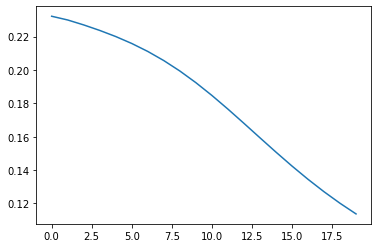



Accuracy : 0.98


In [224]:
print(complete_training(nueron_layers,X_t,Y_t,epochs=20,lr=0.1))

In [225]:
df = pd.read_csv('/content/Iris.csv')
df = df.drop(columns=['Id'])
df = shuffle(df)
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
51,6.4,3.2,4.5,1.5,Iris-versicolor
147,6.5,3.0,5.2,2.0,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa
140,6.7,3.1,5.6,2.4,Iris-virginica
82,5.8,2.7,3.9,1.2,Iris-versicolor


In [226]:
df1 = pd.get_dummies(df['Species'])
df = df.drop(columns=['Species'])
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()

,0,1,2,3
0,0.666667,0.208333,0.813559,0.708333
1,0.083333,0.583333,0.067797,0.083333
2,0.166667,0.416667,0.067797,0.041667
3,0.611111,0.416667,0.813559,0.875000
4,0.333333,0.916667,0.067797,0.041667


In [227]:
X = df.values.tolist()
print(X[:5])
Y = df1.values.tolist()
print(Y[:5])

[[0.6666666666666667, 0.20833333333333326, 0.8135593220338982, 0.7083333333333334], [0.08333333333333326, 0.5833333333333333, 0.06779661016949151, 0.08333333333333333], [0.16666666666666674, 0.41666666666666674, 0.06779661016949151, 0.04166666666666667], [0.6111111111111112, 0.41666666666666674, 0.8135593220338982, 0.8750000000000001], [0.33333333333333326, 0.9166666666666667, 0.06779661016949151, 0.04166666666666667]]
[[0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0]]


In [228]:
def accuracy(X_t,Y_t,weight_list,biases):
  correct = 0
  for i in range(len(X_t)):
    input = X_t[i]
    z,a = forward_propogation(input,weight_list,biases)
    if np.argmax(a[-1])==np.argmax(Y_t[i]):
      correct+=1
  return correct/len(X_t)

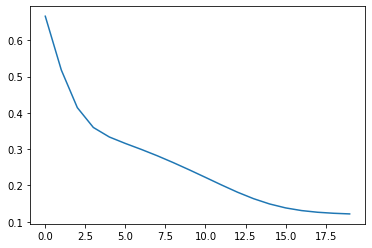



Accuracy : 0.9666666666666667


In [229]:
nueron_layers = [4,16,8,3]
print(complete_training(nueron_layers,X,Y,epochs=20,lr=0.1))